# Cleaning data
with the **read_csv_url()** function wrote by *Chris*

the function of read_csv_url() is:
*   Load a CSV file from a remote URL into a pandas DataFrame
*   Clean column names using janitor(if loading fails, prints a failure message)

Airbnb listings may include duplicates for the same physical property, particularly among professional hosts who frequently create multiple listings to target different guest segments or optimise pricing. Since the public Airbnb data does not reveal exact property identifiers and locations are purposely obfuscated, it is not possible to perfectly de-duplicate units. Therefore, the number of “professional STR units” identified in the analysis should be interpreted as the number of commercial STR listings, not the exact number of distinct dwellings removed from the long-term rental market.

In [1]:
import pandas as pd

In [2]:
import file_reader as fr

url = "../01_Data/Raw/20250615-London-listings.csv/listings.csv"

df = fr.read_csv_url(url)
print("----------------------------------------------------------------------------")
print(f"The data is {df.shape[0]} rows * {df.shape[1]} columns")

Successfully loaded from URL: ../01_Data/Raw/20250615-London-listings.csv/listings.csv
Preview of first 5 rows:
       id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                             name  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

          

## Selecting the columns we want

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [4]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_name', 'host_since', 
    'host_location', 'host_about', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 
    'host_verifications', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
    'amenities', 'price', 'minimum_nights', 'maximum_nights', 
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'license', 'reviews_per_month']
df = df[cols]

# Set to show ALL columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Prevent line wrapping

print(f"Cols contains {len(cols)} columns.")
df.sample(5, random_state = 1)

Cols contains 34 columns.


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
88047,1371159657488873429,https://www.airbnb.com/rooms/1371159657488873429,2025-06-13,Bespoke 2 bed 2bath apartment in South Kensington,Enjoy this centrally-located flatof 2 bed 2 ba...,681589009,Vasile,2025-02-28,NaN,NaN,f,11.0,11.0,"['email', 'phone']",51.493550,-0.184780,Entire rental unit,Entire home/apt,5,2.0,2 baths,2.0,2.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$416.00,5,365,49,0,NaN,NaN,NaN,NaN,NaN
10924,14559403,https://www.airbnb.com/rooms/14559403,2025-06-13,"Bright, Fresh & Modern Ensuite Room","Perfect for business travellers, solo adventur...",61939174,Melody,2016-03-07,"London, United Kingdom",My husband and I are working professionals in ...,f,1.0,2.0,"['email', 'phone']",51.493270,-0.324240,Private room in home,Private room,2,NaN,1 private bath,1.0,NaN,"[""Lockbox"", ""Self check-in"", ""Iron"", ""Hair dry...",NaN,1,40,0,178,2016-09-28,2020-03-15,4.94,NaN,1.68
48134,810774383603868550,https://www.airbnb.com/rooms/810774383603868550,2025-06-11,3 Bedroom Family Friendly home in East London,Welcome to our three bedroom family home!<br /...,371048030,Kate,2020-10-07,"England, United Kingdom",East London Family,f,1.0,1.0,"['email', 'phone']",51.568946,-0.022849,Entire home,Entire home/apt,6,2.5,2.5 baths,3.0,3.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$160.00,2,14,19,12,2023-03-12,2023-09-24,4.83,NaN,0.44
65676,1109998846922231362,https://www.airbnb.com/rooms/1109998846922231362,2025-06-14,Peaceful Garden View Apt. close to Central London,Welcome to our clean and cosy flat nestled in ...,228031450,Aditya,2018-11-28,"London, United Kingdom","Design, entrepreneurship, living fully, exerci...",f,1.0,1.0,"['email', 'phone']",51.503374,-0.283565,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,NaN,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",NaN,1,12,30,5,2024-04-16,2024-10-03,4.60,NaN,0.35
62478,1059430992167095579,https://www.airbnb.com/rooms/1059430992167095579,2025-06-12,Room in artists flat in Hackney,Guest room in an artist's' flat in South Hackn...,20110902,Leah,2014-08-16,"London, United Kingdom","Artist living in Hackney, London",t,1.0,1.0,"['email', 'phone']",51.537340,-0.052940,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$67.00,2,14,187,55,2024-04-21,2025-06-01,4.91,NaN,3.95


## Counting nulls

### Counting Nulls by Column

In [5]:
df.isnull().sum(axis=0).sort_values(ascending=False)

license                      96651
host_about                   47337
beds                         33975
price                        33967
bathrooms                    33921
first_review                 25164
reviews_per_month            25164
review_scores_rating         25164
last_review                  25164
host_location                23328
bedrooms                     12580
description                   2845
host_is_superhost             1823
bathrooms_text                 149
host_name                       40
host_listings_count             38
host_total_listings_count       38
host_since                      38
host_verifications              38
id                               0
listing_url                      0
longitude                        0
last_scraped                     0
host_id                          0
name                             0
latitude                         0
room_type                        0
property_type                    0
accommodates        

In [6]:
# drop the columns which contain too many nans
df.drop(columns=['license','host_about'], inplace=True)

### Counting Nulls by Row

In [7]:
print(f"There are {df.shape[1]} Columns in total!")
df.isnull().sum(axis=1).sort_values(ascending=False)

There are 32 Columns in total!


5155    14
3646    14
4622    14
6122    14
5535    14
        ..
19       0
18       0
15       0
14       0
11       0
Length: 96651, dtype: int64

<class 'pandas.core.series.Series'>


<Axes: ylabel='Frequency'>

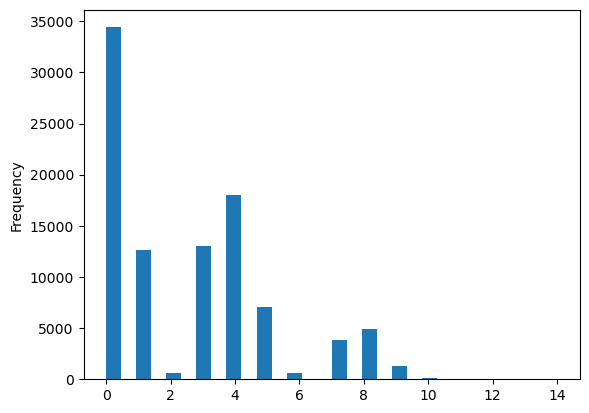

In [8]:
probs = df.isnull().sum(axis=1)
print(type(probs))       
probs.plot.hist(bins=30) 

In [9]:
# drop rows with more than 5 nans
print(f"df contains {df.shape[0]:,} rows.")
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {df.shape[0]:,} rows.")

df contains 96,651 rows.
df contains 85,816 rows.


set the path to store the raw data

In [10]:
from pathlib import Path
import numpy as np
import pandas as pd

In [11]:
path = Path("..") / "01_Data" / "Raw" / Path(url).name
print(f"Writing to: {path}")

Writing to: ../01_Data/Raw/listings.csv


## Fix data type

In [12]:
# boolean type data
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost


In [13]:
# date type data
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 



,last_scraped,host_since,first_review,last_review
73503,2025-06-12,2016-11-29,2024-10-20,2025-05-05
30837,2025-06-13,2011-05-11,2019-12-01,2020-03-08
50741,2025-06-12,2017-11-17,2023-05-13,2023-12-30
46926,2025-06-12,2021-07-30,2023-02-27,2025-05-25
37637,2025-06-13,2018-06-07,NaN,NaN


In [14]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [15]:
# categories type
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 



,property_type,room_type
61872,Entire home,Entire home/apt
3813,Private room in home,Private room
17706,Entire home,Entire home/apt
63429,Private room in rental unit,Private room
73215,Entire home,Entire home/apt


In [16]:
df[cats[0]].value_counts()

property_type
Entire rental unit             37143
Private room in rental unit    11610
Private room in home           10121
Entire condo                    8113
Entire home                     7848
                               ...  
Shared room                        1
Cave                               1
Lighthouse                         1
Private room in resort             1
Shared room in loft                1
Name: count, Length: 88, dtype: int64

In [17]:
df[cats[1]].value_counts()

room_type
Entire home/apt    57168
Private room       28367
Shared room          180
Hotel room           101
Name: count, dtype: int64

In [18]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [19]:
# strings type
money = ['price']
df.sample(5, random_state=42)[money]

,price
61872,NaN
3813,$43.00
17706,NaN
63429,$65.00
73215,NaN


In [20]:
for m in money:
    print(f"Converting {m}")
    try:
        df[m] = df[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')
    except ValueError as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price


In [21]:
df.sort_values(by='price', ascending=False).head(5)[['id','name','price','minimum_nights']]

,id,name,price,minimum_nights
10262,13841484,Bright & airy DoubleBed with EnSuite in Zone 2!,74100.0,2
56678,957005187369596707,Close To London Eye,65000.0,2
84270,1334032580590137938,Amazing Central Location (NBOL),58000.0,2
80103,1289793379859667497,Very Central Room - Walk to Eye,58000.0,2
82485,1311151886101957046,Walk To London Eye,58000.0,2


In [22]:
# int type
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365


In [23]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 85816 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         85816 non-null  int64         
 1   listing_url                85816 non-null  object        
 2   last_scraped               85816 non-null  datetime64[ns]
 3   name                       85816 non-null  object        
 4   description                84147 non-null  object        
 5   host_id                    85816 non-null  int64         
 6   host_name                  85814 non-null  object        
 7   host_since                 85816 non-null  datetime64[ns]
 8   host_location              65657 non-null  object        
 9   host_is_superhost          85816 non-null  bool          
 10  host_listings_count        85816 non-null  int64         
 11  host_total_listings_count  85816 non-null  int64         
 12  host_veri

In [24]:
df.sample(5, random_state = 5)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
20800,25051135,https://www.airbnb.com/rooms/25051135,2025-06-11,"SpaciousDbl:Hampton,Twickenham,Richmond,Sunbury",Stunning home in Hampton Hill close to Hampton...,58301302,Anahita (Ana),2016-02-11,"Hampton Hill, United Kingdom",False,3,3,"['email', 'phone', 'work_email']",51.431090,-0.366490,Private room in home,Private room,1,1.0,1 shared bath,1.0,1,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",50.0,5,1125,351,10,2019-03-09,2024-03-08,4.60,0.13
60321,1023009836518296960,https://www.airbnb.com/rooms/1023009836518297005,2025-06-14,Cosy stay in Wandsworth,"Lovely, quiet room in Wandsworth. Double bed w...",116431954,Emma,2017-02-14,"England, United Kingdom",False,1,1,"['email', 'phone']",51.460805,-0.180421,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,<NA>,"[""Cooking basics"", ""Washer"", ""Smoke alarm"", ""F...",NaN,2,365,0,1,2024-01-04,2024-01-04,5.00,0.06
4315,6704485,https://www.airbnb.com/rooms/6704485,2025-06-12,Sunny Kingsize Bed/En-suite Zone2 Clapham Common,Private kingsize bedroom/ensuite in stylish ho...,23042231,Susan,2014-10-27,"London, United Kingdom",True,5,5,"['email', 'phone', 'work_email']",51.463170,-0.136830,Private room in home,Private room,2,1.0,1 private bath,1.0,1,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",75.0,1,90,143,84,2016-06-21,2025-03-28,4.79,0.77
5945,8714234,https://www.airbnb.com/rooms/8714234,2025-06-13,Sunny 2 Bed Flat with balcony In East London,"Recently renovated 2 bed flat in Clapton, Hack...",10341626,Michal And Boaz,2015-08-14,"London, United Kingdom",False,1,2,"['email', 'phone']",51.559130,-0.056070,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,<NA>,"[""Cooking basics"", ""Washer"", ""Smoke alarm"", ""S...",NaN,3,1125,0,12,2015-10-16,2020-03-01,4.58,0.10
20459,23970014,https://www.airbnb.com/rooms/23970014,2025-06-11,Harrow Weald Studio Room,"Separate Shower room, Separate modern kitchen ...",48246467,Sirinardena Poruthotage Sk,2015-11-05,"Harrow, United Kingdom",False,2,2,"['email', 'phone']",51.607720,-0.347100,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",72.0,4,365,188,38,2018-04-23,2022-11-30,4.95,0.44


Have a look...

# How many professional landlords are there?

Defining the Professional HostConsistent with established literature defining micro-entrepreneurs by their scale and intent (Gydd, 2023), our study defines professional hosts using two core commercial metrics: listing quantity and commercial availability. Specifically, a professional host is identified as a multi-unit operator (managing more than one listing) AND one whose property exhibits high commercial intent by being available for more than 180 days ($\text{availability} > 180$) in a calendar year. This threshold strongly differentiates professional from casual activity. Firstly, multi-listing hosts constitute a clear class of professional operators (Gydd, 2023). Secondly, setting the availability at over 180 days (half the year) exceeds local regulatory limits, such as the London 90-Day Rule (Deregulation Act 2015), which legally delineates casual use. Furthermore, while the most commercial hosts are classified as listed $\ge 240$ days (Barron et al., 2018), our 180-day criterion acts as a robust, intermediate threshold to capture operators whose extensive availability and scale signify a commercial engagement akin to a "quasi-hotel" operator.

In response to the question of **how many landlords there are in London**, I suppose it should not be answered with a single figure. Rather, it should be broken down into four sub-questions:
1. The figure itself
2. What proportion of the total landlords do landlords constitute?
3. What proportion of total housing stock is owned by landlords?
4. What proportion of total landlord income is accounted for by landlords?

So the key now is how to define **LANDLORD**

In [25]:
def counting_landlords(condition):
    """
    Calculates the count of hosts satisfying a specific condition (landlords) 
    and their proportion among all hosts in the dataset.

    Args:
        condition (pd.Series):
    Returns:
        None: The function prints the results directly to the console.
    """
    # 1. Calculate the count of unique hosts satisfying the condition (landlords)
    landlord_count = df[condition]["host_id"].nunique()
    
    # 2. Calculate the total count of all unique hosts
    host_count = df["host_id"].nunique()
    
    # 3. Handle ZeroDivisionError if no hosts are found
    if host_count == 0:
        proportion = 0.00
        print(f"The count of all hosts is 0. Proportion calculation skipped.")
    else:
        # Calculate the proportion of landlords among all hosts
        proportion = (landlord_count * 100) / host_count
    
    print("=====================================================================")
    print(f"The count of all hosts in london is {host_count}.")
    print(f"The count of all professional landlords in london is {landlord_count}.")
    print(f"The proportion of professional landlords among all hosts is {proportion:.2f}%.")
    print("=====================================================================")

Definition of **two demensions** of landlord
>Multi_listing_Hosts
>
>Commerical_Hosts

In [26]:
Multi_listing_Hosts = df["host_listings_count"] > 1
Commerical_Hosts = df["availability_365"] >= 180

In [27]:
counting_landlords(Multi_listing_Hosts)

The count of all hosts in london is 47775.
The count of all professional landlords in london is 13832.
The proportion of professional landlords among all hosts is 28.95%.


In [28]:
counting_landlords(Commerical_Hosts)

The count of all hosts in london is 47775.
The count of all professional landlords in london is 17619.
The proportion of professional landlords among all hosts is 36.88%.


## The count of professional landlord listings 

In [29]:
counting_landlords(Multi_listing_Hosts&Commerical_Hosts)

The count of all hosts in london is 47775.
The count of all professional landlords in london is 7224.
The proportion of professional landlords among all hosts is 15.12%.


Creating a new column for storing boolean value representing professional landlord or not

In [30]:
df['is_pro_landlord'] = Multi_listing_Hosts&Commerical_Hosts
df.sample(5, random_state = 1)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month,is_pro_landlord
73942,1213133182694283264,https://www.airbnb.com/rooms/1213133182694283253,2025-06-11,"Luxury Flat, 2 min walk from O2",Luxury Apartment - 2 minute walk from the 02 A...,580193341,Ashanti,2024-05-28,"London, United Kingdom",False,3,3,['phone'],51.501334,0.00695,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1,"[""Washer"", ""Smoke alarm"", ""Paid parking lot of...",225.0,1,365,309,7,2024-08-18,2024-09-17,4.71,0.70,True
63354,1074352305172927104,https://www.airbnb.com/rooms/1074352305172927050,2025-06-12,"1-Bedroom Flat with Balcony, near Tower of London",This apartment has everything you need to live...,557379201,Minna,2024-01-19,"London, United Kingdom",True,4,4,['phone'],51.511167,-0.07111,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2,"[""Cooking basics"", ""Washer"", ""Self check-in"", ...",187.0,1,365,30,7,2024-03-26,2025-05-31,4.71,0.47,False
47193,781997691837253248,https://www.airbnb.com/rooms/781997691837253275,2025-06-11,Уютная Комната в аренду в центре Лондона,Located in central London. You will be able to...,263270611,Таня,2019-05-21,"England, United Kingdom",False,3,4,"['email', 'phone']",51.460660,-0.06040,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1,"[""Wine glasses"", ""Iron"", ""Smoke alarm"", ""First...",45.0,1,365,67,12,2023-03-04,2023-06-14,5.00,0.43,False
42775,671662210364514176,https://www.airbnb.com/rooms/671662210364514167,2025-06-14,Spacious Studio Apartment in Zone 1 near Holborn,Our lovely quiet private student accommodation...,446421145,Dan,2022-02-22,NaN,False,39,39,"['email', 'phone']",51.519300,-0.10653,Entire serviced apartment,Entire home/apt,2,NaN,1.5 baths,1.0,<NA>,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",NaN,3,365,0,13,2022-07-31,2025-05-01,4.38,0.37,False
2805,4412945,https://www.airbnb.com/rooms/4412945,2025-06-13,Central Beautiful Quiet Light 1-Bed,"Centrally located in Clerkenwell, in an area w...",17440224,Sylvia,2014-06-30,"San Francisco, CA",False,1,3,"['email', 'phone']",51.523350,-0.10152,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,<NA>,"[""Washer"", ""Smoke alarm"", ""Heating"", ""Elevator...",NaN,3,1125,0,17,2015-01-03,2016-08-29,4.35,0.13,False


Plot: ()

In [31]:
from pathlib import Path
from requests import get
from functools import wraps
import geopandas as gpd

def check_cache(f):
    @wraps(f)
    def wrapper(src:str, dst:str, min_size=100) -> Path:
        url = Path(src) 
        fn  = url.name  
        dsn = Path(f"{dst}/{fn}") 
        if dsn.is_file() and dsn.stat().st_size > min_size:
            print(f"+ {dsn} found locally!")
            return(dsn)
        else:
            print(f"+ {dsn} not found, downloading!")
            return(f(src, dsn))
    return wrapper

@check_cache
def cache_data(src:Path, dst:Path) -> str:
    """Downloads a remote file.
    
    
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
      
    # Create...
    if not dst.parent.exists():
        dst.parent.mkdir(parents=True, exist_ok=True)
        
    # Download and write the file
    with dst.open(mode='wb') as file:
        response = get(src)
        file.write(response.content)
        
    print(' + Done downloading...')

    return dst.resolve()

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: pathlib.Path, dst: pathlib.Path) -> str
    Downloads a remote file.



    Returns
    -------
    str
        A string representing the local location of the file.



In [32]:
gdf = gpd.GeoDataFrame(df,
      geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
# read london boro data remotely
remote_gpkg_url = 'https://github.com/jreades/fsds/raw/master/data/src/Boroughs.gpkg'
boros = gpd.read_file(remote_gpkg_url)

gdf = gdf.to_crs("epsg:27700") 
boros = boros.to_crs("epsg:27700")

listings_with_boro = gpd.sjoin(gdf, boros[['NAME', 'geometry']], how='left', predicate='within')

# converting to DataFrame fomart (more efficiently) 
listings_df = listings_with_boro.drop(columns=['geometry']).copy() 

###=====================================================###
### Here calculate the number of professional landlords in 
### each borough. Where a professional landlord has multiple
### listings across different boroughs, the borough with the
### highest number of listings shall prevail. Where multiple
### boroughs have the same number of listings, the borough
### with the highest average price shall prevail.
###=====================================================###

# 1. Calculate the number of properties and average price 
# for each landlord in each administrative district 
# (assuming the “price” column exists in the dataframe).
host_boro_stats = listings_df.groupby(['host_id', 'NAME']).agg(
    listing_count_in_boro=('host_id', 'size'),
    average_price=('price', 'mean')
).reset_index()

# 2. Sorting: Quantity descending, price descending 
# (resolving ties)
sorted_stats = host_boro_stats.sort_values(
    ['host_id', 'listing_count_in_boro', 'average_price'],
    ascending=[True, False, False]
)

# 3. Determine the unique administrative district 
# represented by each host_id
host_main_locations = sorted_stats.groupby('host_id').first().reset_index()

# 4. Merge is_pro_landlord status
# Ensure is_pro_landlord status is non-duplicative, sourced from original data
pro_status = listings_df[['host_id', 'is_pro_landlord']].drop_duplicates()
host_main_locations = host_main_locations.merge(pro_status, on='host_id', how='left')

pro_landlord_df = host_main_locations[host_main_locations["is_pro_landlord"] == True]

# Count the number of professional landlord IDs by administrative district name (NAME)
pro_landlord_count_by_boro = pro_landlord_df.groupby('NAME')['host_id'].count().reset_index(name='pro_landlord_count')

# Merge into geographic boundary data
boros_with_stats = boros.merge(pro_landlord_count_by_boro, on='NAME', how='left')
boros_with_stats['pro_landlord_count'] = boros_with_stats['pro_landlord_count'].fillna(0) # set na value to zero

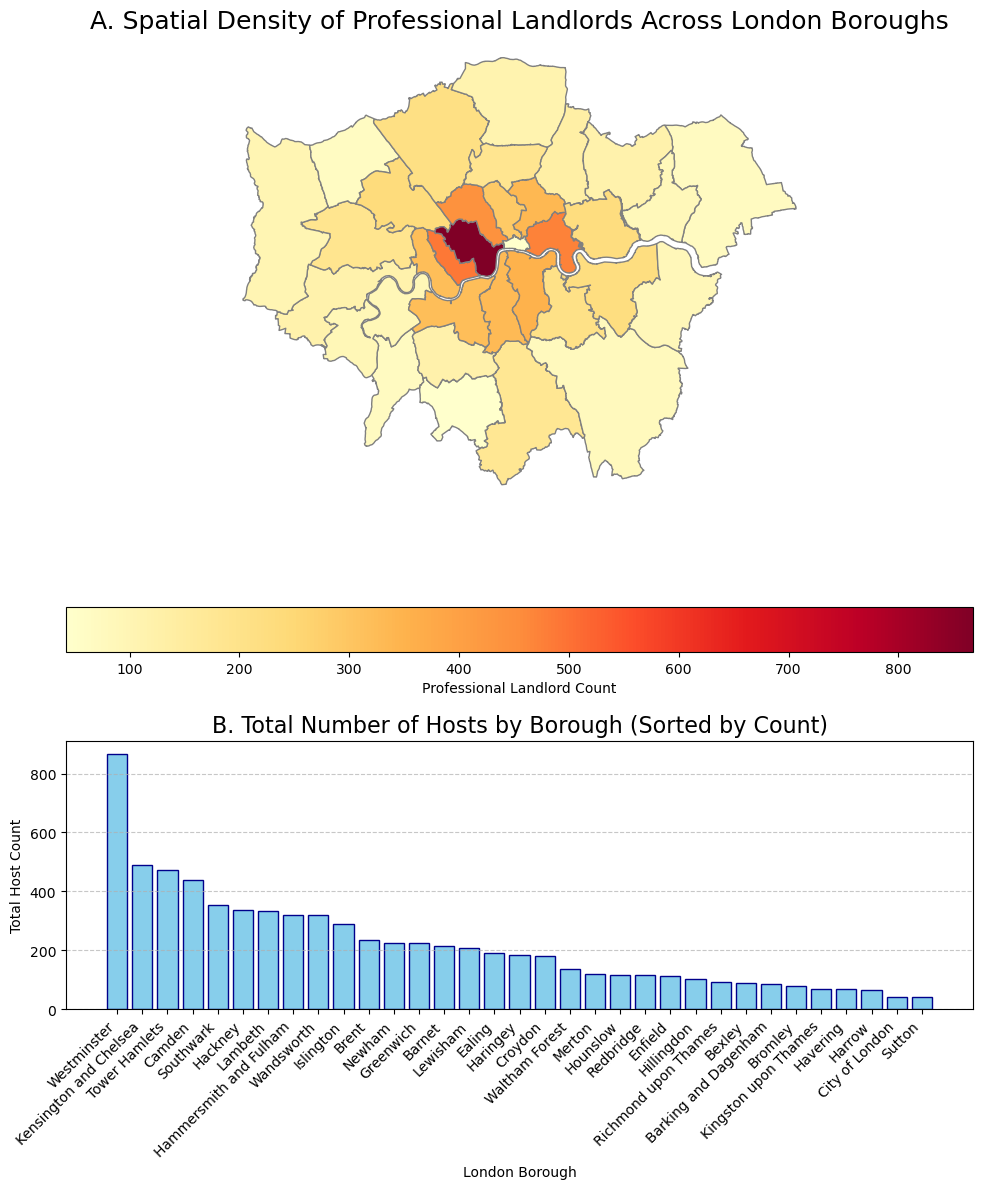

In [33]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd  


# --- 3.Create a twin-pane layout ---
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12),  
                         gridspec_kw={'height_ratios': [2.5, 1]}) 


# --- 4. Draw the choropleth map above ---
ax0 = axes[0] 


boros_with_stats.plot(column='pro_landlord_count',
                      # Warm colours are more suitable for indicating quantity.
                      cmap='YlOrRd', 
                      legend=True,
                      legend_kwds={'label': "Professional Landlord Count",
                                   'orientation': "horizontal"},
                      ax=ax0,                       
                      edgecolor='grey',            
                      missing_kwds={'color': 'lightgrey', 'label': 'No Data'}
                     )

ax0.set_title('A. Spatial Density of Professional Landlords Across London Boroughs', fontsize=18)
ax0.set_axis_off() 


# --- 5. Plot the bar plot below ---

ax1 = axes[1] 

# Core step: Sort in descending order by total_landlord_count
plot_data = boros_with_stats.drop(columns=['geometry']).sort_values('pro_landlord_count', ascending=False)

# plot bar chart
ax1.bar(plot_data['NAME'], 
        plot_data['pro_landlord_count'], 
        color='skyblue',
        edgecolor='darkblue')

ax1.set_title('B. Total Number of Hosts by Borough (Sorted by Count)', fontsize=16)
ax1.set_ylabel('Total Host Count')
ax1.set_xlabel('London Borough')

# Adjust the X-axis labels to make them slanted
plt.xticks(rotation=45, ha='right', fontsize=10) 
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Adjust subgraph spacing
plt.tight_layout() 
plt.show()

In [34]:
listings_with_boro.head(5)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month,is_pro_landlord,geometry,index_right,NAME
0,264776,https://www.airbnb.com/rooms/264776,2025-06-11,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",297.0,3,365,293,68,2014-07-03,2025-05-28,4.68,0.51,True,POINT (537737.328 173423.242),12,Lewisham
1,264777,https://www.airbnb.com/rooms/264777,2025-06-11,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",98.0,3,365,318,24,2016-07-21,2024-12-11,4.58,0.22,True,POINT (537703.938 173397.858),12,Lewisham
2,264778,https://www.airbnb.com/rooms/264778,2025-06-11,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",148.0,3,365,302,58,2014-04-21,2025-05-01,4.50,0.43,True,POINT (537508.499 173476.041),12,Lewisham
3,264779,https://www.airbnb.com/rooms/264779,2025-06-11,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44355,-0.02309,Entire rental unit,Entire home/apt,5,1.0,1 bath,2.0,5,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",144.0,3,365,328,36,2015-07-23,2025-04-10,4.64,0.30,True,POINT (537484.993 173470.956),12,Lewisham
4,264780,https://www.airbnb.com/rooms/264780,2025-06-11,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44333,-0.02307,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,4,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",157.0,3,365,255,54,2012-09-18,2024-12-29,4.68,0.35,True,POINT (537487.042 173446.529),12,Lewisham


# How many properties would be affected by the opposition’s proposal?

In [35]:
def counting_listings(condition):
    """
    Calculates the total number of listings and the number of listings 
    affected by a specific policy or condition.

    Args:
        condition (pd.Series): 
    Returns:
        None: The function prints the results directly to the console.
    """
    
    # 1. Calculate the count of affected listings (those that meet the condition)
    # Since each row represents a listing, we just count the True values in the condition.
    affected_count = len(df[condition])
    
    # 2. Calculate the total count of all listings (total rows in df)
    total_count = len(df)
    
    # 3. Handle ZeroDivisionError if no listings are found
    if total_count == 0:
        proportion = 0.00
        print(f"The count of all listings is 0. Analysis skipped.")
    else:
        # Calculate the proportion of affected listings among all listings
        proportion = (affected_count * 100) / total_count
    
    # --- Print results with clear formatting ---
    print("=====================================================================")
    print(f"Total number of properties (listings): {total_count}")
    print(f"Properties affected by proposal (affected listings): {affected_count}")
    print("---------------------------------------------------------------------")
    # For the proportion, we use :.2f for two decimal places
    print(f"Proportion of affected properties: {proportion:.2f}%")
    print("=====================================================================")

In [36]:
counting_listings(Multi_listing_Hosts&Commerical_Hosts)

Total number of properties (listings): 85816
Properties affected by proposal (affected listings): 25512
---------------------------------------------------------------------
Proportion of affected properties: 29.73%


# Q4: What are the likely pros and cons of the opposition’s proposal (for the Mayor, for residents, and for the city)?

## Path 1: Quantifying Commercial Dominance (Supporting the Mayor/City Governance)

**Objective:** To demonstrate that market profits and listings are disproportionately controlled by commercial operators, justifying targeted regulatory action.

| Analysis Goal | Key Data Columns | Analytical Approach | Support for Pros/Cons |
| :--- | :--- | :--- | :--- |
| **Revenue Concentration** | `price`, `minimum_nights` | Calculate the **Total Potential Annual Revenue** generated by listings of Professional Hosts (those with >1 or >2 listings) as a proportion of the total market revenue. | **Pros:** Proves market revenue is highly concentrated among a few commercial entities, affirming the proposal is a **surgical strike** against speculation. |
| **Investment Portfolio Size** | `host_listings_count` | Categorize hosts into tiers (e.g., 1 listing, 2-5 listings, >5 listings). Analyze the distribution of the **25,512 affected listings** across these tiers. | **Cons:** Quantifies the scale of the shock to professional management companies, serving as a reliable measure for the "Economic Activity Displacement" argument. |

In [37]:
len(df)

85816

In [38]:
# ==============================================================================
# 1. Revenue Concentration Analysis
# Objective: Calculate the proportion of total potential annual revenue generated by Pro-Landlords.
# ==============================================================================

print("="*60)
print("**1. Revenue Concentration Analysis (Pros Argument: Surgical Strike)**")
print("="*60)

# Define max days for potential annual revenue (maximum possible market size)
MAX_DAYS_PER_YEAR = 365

# 1.1 Calculate Potential Annual Revenue (Upper bound: price * 365 days)
df['potential_annual_revenue'] = pd.to_numeric(df['price'], errors='coerce') * MAX_DAYS_PER_YEAR

# Clean data by dropping NaNs that might result from price conversion, or filling them with 0
df_q4_p2 = df.dropna(subset=['potential_annual_revenue'])

# 1.2 Calculate total market revenue
total_market_revenue = df_q4_p2['potential_annual_revenue'].sum()

# 1.3 Calculate revenue generated by professional landlords' listings
pro_revenue = df_q4_p2.loc[df_q4_p2['is_pro_landlord'], 'potential_annual_revenue'].sum()

# 1.4 Calculate the concentration ratio
revenue_concentration_ratio = (pro_revenue / total_market_revenue) * 100

print(f"Total Market Potential Annual Revenue (Upper Bound): £{total_market_revenue:,.0f}")
print(f"Professional Host Revenue Contribution: £{pro_revenue:,.0f}")
print(f"\nConclusion: Professional Host listings generate {revenue_concentration_ratio:.2f}% of the total market revenue.")

# ---------------------------------------------------------------------

# ==============================================================================
# 2. Investment Portfolio Size Analysis
# Objective: Analyze the distribution of affected listings across host portfolio tiers.
# ==============================================================================

print("\n" + "="*60)
print("**2. Investment Portfolio Size Analysis (Cons Argument: Economic Displacement)**")
print("="*60)

# Filter for the 25,512 affected listings (those marked as professional)
affected_listings = df_q4_p2[df_q4_p2['is_pro_landlord'] == True].copy()

# Define portfolio size tiers (using standard tiers for multi-listing hosts)
BINS = [1, 5, 20, affected_listings['host_listings_count'].max() + 1]
LABELS = ['1 (Non-Pro)', '2-5 Listings', '6-20 Listings', 'Over 20 Listings']

# Ensure host_listings_count is numeric
affected_listings['host_listings_count'] = pd.to_numeric(
    affected_listings['host_listings_count'], errors='coerce'
)

# Apply binning to the affected listings
affected_listings['portfolio_tier'] = pd.cut(
    affected_listings['host_listings_count'], 
    bins=BINS, 
    labels=LABELS[1:], # Start labeling from 2-5 Listings, since 1 is excluded by filtering
    right=True,
    include_lowest=True
)

# 2.1 Calculate the distribution of affected listings by tier
portfolio_distribution = affected_listings['portfolio_tier'].value_counts(normalize=True).sort_index() * 100

# 2.2 Format the result
portfolio_df = pd.DataFrame(portfolio_distribution).reset_index()
portfolio_df.columns = ['Portfolio Tier', 'Percentage of Affected Listings']

# Format the percentage column for clean output
portfolio_df['Percentage of Affected Listings'] = portfolio_df['Percentage of Affected Listings'].map('{:.2f}%'.format)

print(f"Total Affected Listings (is_pro_landlord=True): {len(affected_listings):,}")
print("\nDistribution of Affected Listings across Host Portfolio Sizes:")
# Output table shows which portfolio sizes bear the brunt of the regulation.
print(portfolio_df.to_markdown(index=False))

# ---------------------------------------------------------------------

**1. Revenue Concentration Analysis (Pros Argument: Surgical Strike)**
Total Market Potential Annual Revenue (Upper Bound): £4,782,411,040
Professional Host Revenue Contribution: £2,312,212,220

Conclusion: Professional Host listings generate 48.35% of the total market revenue.

**2. Investment Portfolio Size Analysis (Cons Argument: Economic Displacement)**
Total Affected Listings (is_pro_landlord=True): 24,697

Distribution of Affected Listings across Host Portfolio Sizes:
| Portfolio Tier   | Percentage of Affected Listings   |
|:-----------------|:----------------------------------|
| 2-5 Listings     | 38.10%                            |
| 6-20 Listings    | 29.93%                            |
| Over 20 Listings | 31.97%                            |


## Path 2: Measuring Disparity of Community Impact (Supporting Long-Term Residents)

**Objective:** To prove that the benefits of the proposal (reduced nuisance, increased housing) are critically needed in specific, high-pressure areas.

| Analysis Goal | Key Data Columns | Analytical Approach | Support for Pros/Cons |
| :--- | :--- | :--- | :--- |
| **Geographical Pressure Zones** | `neighbourhood` / `neighbourhood_group` | Calculate the **density or percentage** of the **25,512 affected listings** within each London borough. | **Pros:** Demonstrates the necessity of **devolved regulatory power**. The greatest improvements in resident quality of life occur in these high-pressure zones. |
| **Listing Activity & Nuisance** | `reviews_per_month` | Compare the **average monthly reviews** for the affected listings vs. compliant listings (High reviews = high turnover/traffic). | **Pros:** High activity listings are the primary source of community nuisance (ASB). The proposal's effectiveness in reducing these "mini-hotels" is validated. |

In [40]:
# ==============================================================================
# 1. Spatial Join Execution
# ==============================================================================

# Assign Airbnb listings (points) to their respective Boroughs (polygons)
airbnb_with_boroughs = gpd.sjoin(
    gdf,
    boros[['NAME', 'geometry']],
    how='left',
    predicate='within'
)

print(f"[OK] Spatial join complete. Result rows: {len(airbnb_with_boroughs)}")


# ==============================================================================
# 2. Merge Join Results back to df
# ==============================================================================

# Because gdf was built from cleaned df, lengths match 1:1
df['Borough_Cleaned'] = airbnb_with_boroughs['NAME'].to_numpy()

nan_boroughs = df['Borough_Cleaned'].isna().sum()
print(f"[INFO] {len(df) - nan_boroughs} listings assigned to a Borough.")
print(f"[INFO] {nan_boroughs} listings out of Borough boundaries.")


# ==============================================================================
# 3. Geographical Pressure Analysis
# ==============================================================================

print("\n" + "="*60)
print("**3. Geographical Pressure Analysis: Pro-Landlord Ratio by Borough**")
print("="*60)

COMMUNITY_COLUMN = 'Borough_Cleaned'

neighbourhood_stats = df.groupby(COMMUNITY_COLUMN).agg(
    total_listings=('id', 'count'),
    pro_listings=('is_pro_landlord', 'sum')
).reset_index()

neighbourhood_stats['pro_listing_ratio'] = (
    neighbourhood_stats['pro_listings'] / neighbourhood_stats['total_listings'] * 100
)

pressure_areas = neighbourhood_stats.sort_values(
    by='pro_listing_ratio', ascending=False
).dropna(subset=[COMMUNITY_COLUMN])

pressure_areas['pro_listing_ratio'] = pressure_areas['pro_listing_ratio'].map('{:.2f}%'.format)

print("Top 10 Boroughs by Professional Landlord Listing Ratio:")
print(pressure_areas.head(10).to_markdown(index=False))


# ==============================================================================
# 4. Activity and Nuisance Analysis
# ==============================================================================

print("\n" + "="*60)
print("**4. Listing Activity and Nuisance Analysis**")
print("="*60)

activity_comparison = df.groupby('is_pro_landlord')['reviews_per_month'].agg(
    ['mean', 'median', 'count']
)

print("Monthly Reviews Comparison (Pro vs Non-Pro):")
print(activity_comparison)

mean_pro = activity_comparison.loc[True, 'mean']
mean_non_pro = activity_comparison.loc[False, 'mean']
mean_difference = (mean_pro - mean_non_pro) / mean_non_pro * 100

print("\n**Conclusion Summary:**")
print(f"Professional landlord listings are {mean_difference:.2f}% more active.")
print("This supports the argument that reducing high-turnover STRs improves residential life.")

[OK] Spatial join complete. Result rows: 85816
[INFO] 85816 listings assigned to a Borough.
[INFO] 0 listings out of Borough boundaries.

**3. Geographical Pressure Analysis: Pro-Landlord Ratio by Borough**
Top 10 Boroughs by Professional Landlord Listing Ratio:
| Borough_Cleaned        |   total_listings |   pro_listings | pro_listing_ratio   |
|:-----------------------|-----------------:|---------------:|:--------------------|
| City of London         |              526 |            312 | 59.32%              |
| Hillingdon             |              859 |            371 | 43.19%              |
| Redbridge              |              892 |            377 | 42.26%              |
| Havering               |              462 |            192 | 41.56%              |
| Bexley                 |              601 |            244 | 40.60%              |
| Westminster            |            10511 |           4120 | 39.20%              |
| Kensington and Chelsea |             5727 |           2

## Path 3: Evaluating Tourism Market Impact (Supporting City Economy & Tourism)

**Objective:** To assess how the proposal might negatively impact tourist choice and flexibility.

| Analysis Goal | Key Data Columns | Analytical Approach | Support for Pros/Cons |
| :--- | :--- | :--- | :--- |
| **Scarcity of Alternative Accommodation** | `room_type` | Calculate the proportion of the **25,512 affected listings** that are **"Entire home/apt"** rentals. | **Cons:** Entire homes are critical for families/groups. Their mass removal will **severely restrict flexibility** for these segments, strengthening the "Anti-Tourist Image" argument. |
| **True Commercial Nature** | `minimum_nights` | Analyze the **average and median minimum stay requirement** for the affected listings. | **Pros:** If the minimum stay is concentrated at 1-2 nights, it further proves they are **pure commercial hotel substitutes**, reinforcing the proposal's legitimacy. |

In [41]:
# ==============================================================================
# 1. Scarcity of Alternative Accommodation Analysis
# Objective: Calculate the proportion of affected listings that are "Entire home/apt" (Critical for groups/families).
# ==============================================================================

print("="*60)
print("**1. Scarcity of Alternative Accommodation Analysis (Cons Argument)**")
print("="*60)

# 1.1 Calculate the count of "Entire home/apt" in the affected set
entire_home_count = affected_listings[affected_listings['room_type'] == 'Entire home/apt'].shape[0]

# 1.2 Calculate the total count of affected listings
total_affected_listings = affected_listings.shape[0]

# 1.3 Calculate the proportion
entire_home_proportion = (entire_home_count / total_affected_listings) * 100

print(f"Total Affected Listings (Pro-Landlord): {total_affected_listings:,}")
print(f"Affected 'Entire home/apt' Listings: {entire_home_count:,}")
print(f"\nConclusion: {entire_home_proportion:.2f}% of the affected listings are 'Entire home/apt'.")

# ---------------------------------------------------------------------

# ==============================================================================
# 2. True Commercial Nature Analysis
# Objective: Analyze the minimum stay requirement for the affected listings.
# ==============================================================================

print("\n" + "="*60)
print("**2. True Commercial Nature Analysis (Pros Argument)**")
print("="*60)

# Ensure minimum_nights is numeric (and handle potential extreme outliers if necessary, though not explicitly requested)
affected_listings['minimum_nights'] = pd.to_numeric(
    affected_listings['minimum_nights'], errors='coerce'
)

# 2.1 Calculate the average and median minimum stay
min_nights_stats = affected_listings['minimum_nights'].agg(['mean', 'median'])

# 2.2 Calculate the percentage of listings requiring only a 1 or 2-night minimum stay
short_stay_count = affected_listings[
    affected_listings['minimum_nights'].isin([1, 2])
].shape[0]

short_stay_proportion = (short_stay_count / total_affected_listings) * 100

print("Minimum Stay Requirements for Affected Listings:")
print(min_nights_stats)
print(f"\nConclusion: {short_stay_proportion:.2f}% of affected listings require only a 1 or 2-night minimum stay.")

# ---------------------------------------------------------------------

**1. Scarcity of Alternative Accommodation Analysis (Cons Argument)**
Total Affected Listings (Pro-Landlord): 24,697
Affected 'Entire home/apt' Listings: 17,080

Conclusion: 69.16% of the affected listings are 'Entire home/apt'.

**2. True Commercial Nature Analysis (Pros Argument)**
Minimum Stay Requirements for Affected Listings:
mean      5.53217
median    2.00000
Name: minimum_nights, dtype: float64

Conclusion: 62.26% of affected listings require only a 1 or 2-night minimum stay.


In [43]:
df.head(5)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month,is_pro_landlord,potential_annual_revenue,Borough_Cleaned
0,264776,https://www.airbnb.com/rooms/264776,2025-06-11,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",297.0,3,365,293,68,2014-07-03,2025-05-28,4.68,0.51,True,108405.0,Lewisham
1,264777,https://www.airbnb.com/rooms/264777,2025-06-11,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",98.0,3,365,318,24,2016-07-21,2024-12-11,4.58,0.22,True,35770.0,Lewisham
2,264778,https://www.airbnb.com/rooms/264778,2025-06-11,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",148.0,3,365,302,58,2014-04-21,2025-05-01,4.50,0.43,True,54020.0,Lewisham
3,264779,https://www.airbnb.com/rooms/264779,2025-06-11,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44355,-0.02309,Entire rental unit,Entire home/apt,5,1.0,1 bath,2.0,5,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",144.0,3,365,328,36,2015-07-23,2025-04-10,4.64,0.30,True,52560.0,Lewisham
4,264780,https://www.airbnb.com/rooms/264780,2025-06-11,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,1389063,Sue,2011-11-09,United Kingdom,False,11,12,"['email', 'phone']",51.44333,-0.02307,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,4,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",157.0,3,365,255,54,2012-09-18,2024-12-29,4.68,0.35,True,57305.0,Lewisham


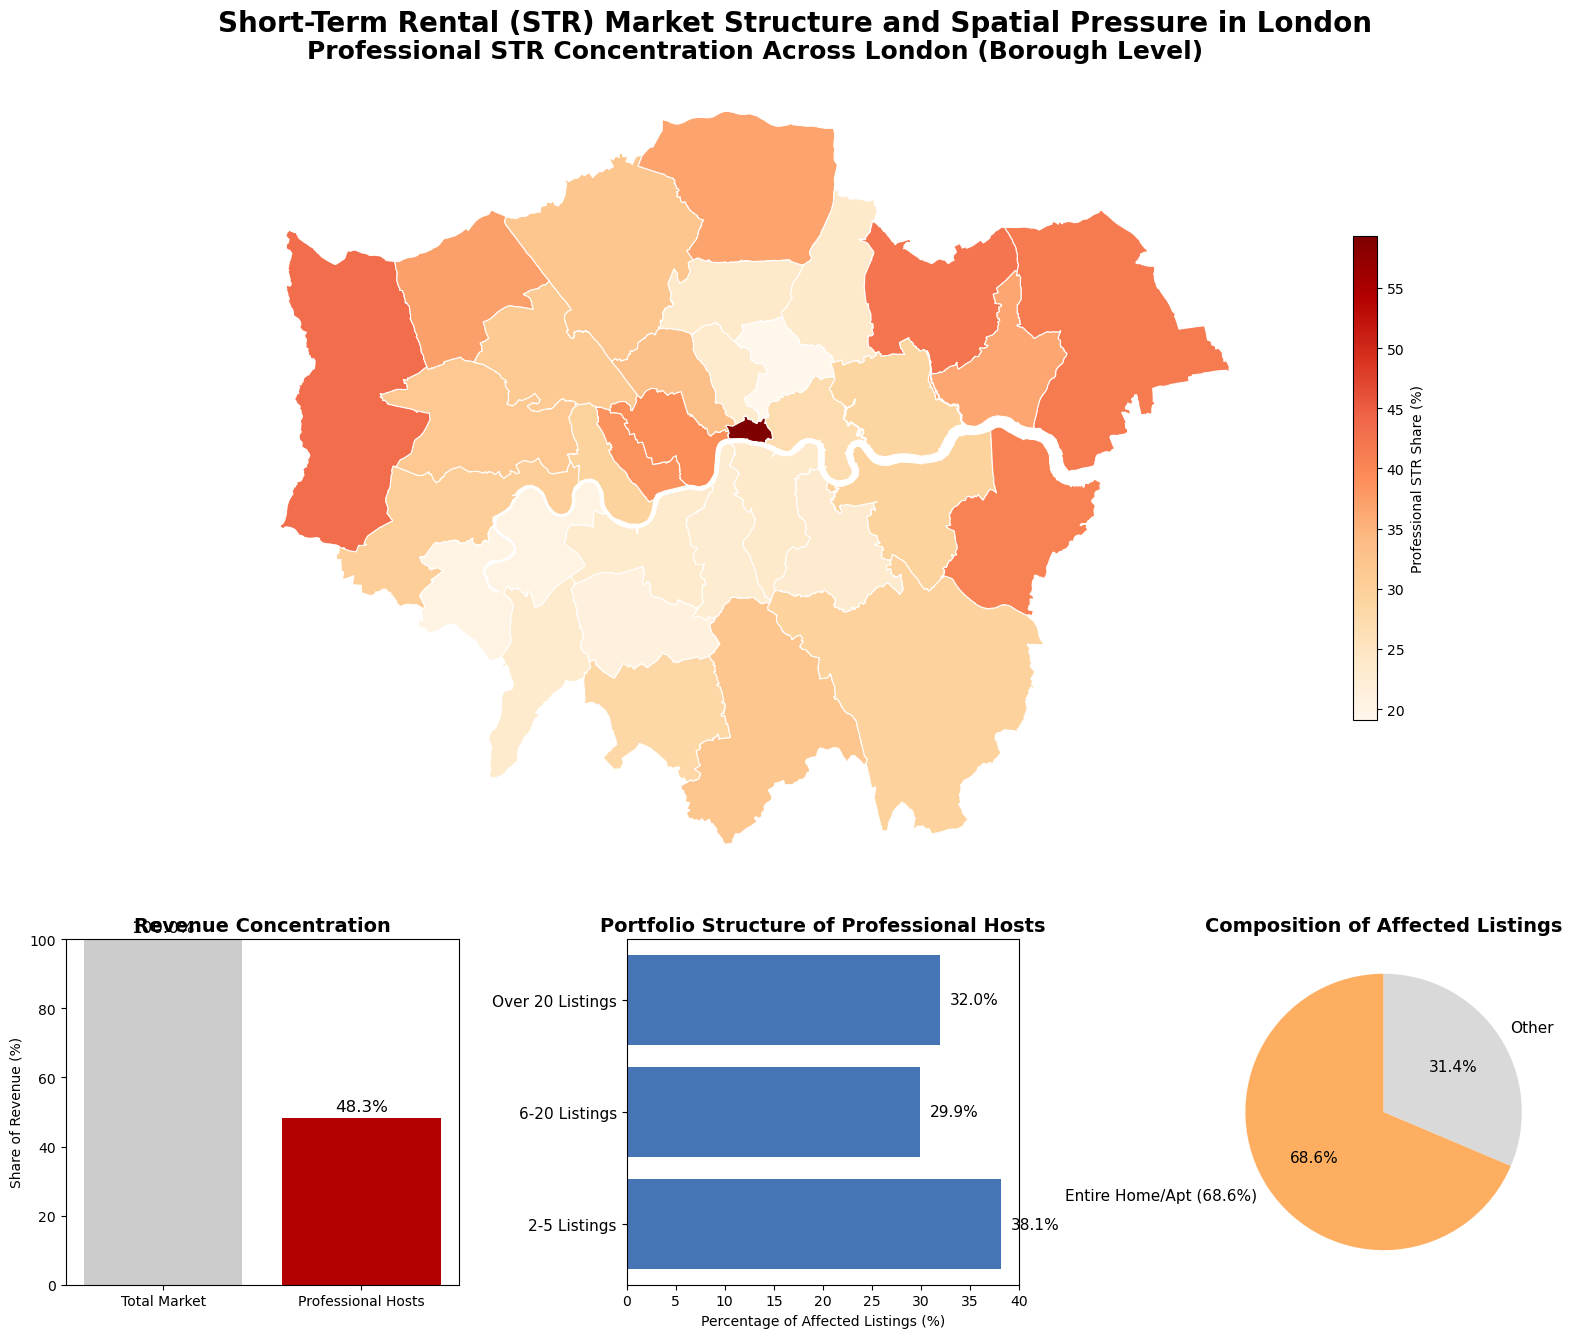

In [47]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# ------------------------------------------------------------
# 1. BOROUGH-LEVEL PRESSURE — aggregate Airbnb → borough
# ------------------------------------------------------------

# Ensure df has Borough_Cleaned
borough_stats = df.groupby("Borough_Cleaned").agg(
    total_listings=('id', 'count'),
    pro_listings=('is_pro_landlord', 'sum')
).reset_index()

borough_stats["pro_share"] = borough_stats["pro_listings"] / borough_stats["total_listings"] * 100

# Merge results BACK into borough geometries
map_boro = boros.merge(
    borough_stats,
    left_on="NAME",   # adjust if your borough column is different
    right_on="Borough_Cleaned",
    how="left"
)

# ------------------------------------------------------------
# 2. Path 1 — Revenue + Portfolio
# ------------------------------------------------------------

rev_share = revenue_concentration_ratio  # e.g., 48.35%

portfolio_labels = portfolio_df["Portfolio Tier"].tolist()
portfolio_values = (
    portfolio_df["Percentage of Affected Listings"]
    .str.rstrip("%").astype(float).tolist()
)

# ------------------------------------------------------------
# 3. Path 3 — Entire Home % (Pro landlords only)
# ------------------------------------------------------------

entire_pct = (
    df[df["is_pro_landlord"]]["room_type"]
      .eq("Entire home/apt")
      .mean()
      * 100
)

# ------------------------------------------------------------
# 4. FIGURE LAYOUT — big map + 3 small charts
# ------------------------------------------------------------

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 3, height_ratios=[3.5, 1.5, 0.1])

# ============================================================
# TOP PANEL — Borough STR Pressure Map
# ============================================================

ax_map = fig.add_subplot(gs[0, :])

map_boro.plot(
    column="pro_share",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="white",
    ax=ax_map,
    legend=True,
    legend_kwds={"label": "Professional STR Share (%)", "shrink": 0.6}
)

ax_map.set_title(
    "Professional STR Concentration Across London (Borough Level)",
    fontsize=18, weight="bold", pad=12
)
ax_map.axis("off")

# ============================================================
# BOTTOM LEFT — Revenue Concentration
# ============================================================

ax1 = fig.add_subplot(gs[1, 0])

bars = ["Total Market", "Professional Hosts"]
values = [100, rev_share]

ax1.bar(bars, values, color=["#cccccc", "#b30000"])
ax1.set_ylim(0, 100)
ax1.set_title("Revenue Concentration", fontsize=14, weight="bold")
ax1.set_ylabel("Share of Revenue (%)")

for i, v in enumerate(values):
    ax1.text(i, v + 2, f"{v:.1f}%", ha="center", fontsize=12)

# ============================================================
# BOTTOM MIDDLE — Portfolio Structure
# ============================================================

ax2 = fig.add_subplot(gs[1, 1])

y_pos = np.arange(len(portfolio_labels))
ax2.barh(y_pos, portfolio_values, color="#4575b4")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(portfolio_labels, fontsize=11)
ax2.set_xlabel("Percentage of Affected Listings (%)")
ax2.set_title("Portfolio Structure of Professional Hosts", fontsize=14, weight="bold")

for i, v in enumerate(portfolio_values):
    ax2.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=11)

# ============================================================
# BOTTOM RIGHT — Entire Home %
# ============================================================

ax3 = fig.add_subplot(gs[1, 2])

sizes = [entire_pct, 100 - entire_pct]
labels = ["Entire Home/Apt", "Other"]
colors = ["#fdae61", "#d9d9d9"]

ax3.pie(
    sizes,
    labels=[f"{labels[0]} ({entire_pct:.1f}%)", labels[1]],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11}
)
ax3.set_title("Composition of Affected Listings", fontsize=14, weight="bold")

# ------------------------------------------------------------
# Global Title
# ------------------------------------------------------------

fig.suptitle(
    "Short-Term Rental (STR) Market Structure and Spatial Pressure in London",
    fontsize=20, weight="bold", y=0.98
)

plt.tight_layout()
plt.show()



## Extra: Integrating External Databases Analysis Paths

**Objective:** To introduce macroeconomic and social context, assessing the holistic impact of Airbnb on London's urban environment.

| External Database/Source | How to Integrate | Support for Pros/Cons |
| :--- | :--- | :--- |
| **ONS Rental Data** | Integrate **ONS administrative-level long-term rental data** to **estimate the potential downward pressure on local rents** if the 25,512 listings return to the market. | **Housing Affordability (Pros):** Provides a quantitative economic model for the proposal's biggest benefit. |
| **Hotel Market Data** | Compare the average daily rate (`price`) of affected Airbnb listings against local **hotel rates and occupancy data**. | **Fair Competition (Pros) & Tourism Shock (Cons):** Justifies regulatory action by showing direct competition with hotels, while assessing the capacity of the hotel industry to absorb displaced tourists. |
| **Met Police Crime Data** | Compare the rate of **Anti-Social Behaviour (ASB) reports** in high short-term rental density areas against low-density areas. | **Reduce Nuisance (Pros):** Directly correlates high short-term rental activity with negative community impacts, supporting the residents' need for the proposal. |
| **Companies House Data** | Attempt to cross-reference host details for hosts with high `host_listings_count` against **legally registered commercial companies**. | **Combat Commercialization (Pros):** Provides concrete evidence that professional hosts are **registered businesses**, supporting the proposal's necessity. |

### Potential Downward Pressure on Local Rents with ONS Rental Data

The purpose of this analysis is to help the Mayor understand whether London’s short-term rental (STR) sector—particularly commercial Airbnb activity—poses a meaningful risk to housing supply, affordability, and neighbourhood stability. The research aims to evaluate the scale, spatial concentration, and commercial nature of professional STR operations, and to assess how the opposition’s proposal (registration + higher Council Tax for professional landlords) would affect different boroughs. Ultimately, the goal is to provide an evidence-informed and politically realistic assessment of the potential benefits and drawbacks of adopting the proposed regulation.

To answer these questions, the analysis combines Airbnb listing data with official rental market statistics from the Office for National Statistics (ONS). The approach involves several steps:

Identification of Professional STR Activity
Using Airbnb variables such as host listing counts, entire-home listings, and minimum stay requirements, the study classifies “professional landlords” and identifies all listings likely to be affected by the proposed regulation.

Spatial Aggregation to Borough Level
Airbnb listings are summarised for each London borough, producing measures such as total listings, professional listings, and commercial intensity.

Integration with ONS Private Rental Market Data
Borough-level Airbnb statistics are merged with ONS Table 2.7, which provides median rents and counts of private rented sector (PRS) properties. This enables the construction of comparable indicators of STR pressure relative to PRS size.

Airbnb Intensity Metrics
Key indicators—such as total Airbnb listings per 1,000 PRS units and professional listings per 1,000 PRS units—are calculated to identify where Airbnb activity is most concentrated.

Scenario Modelling: Return-to-PRS Impact
A 5–10% return of professional STR units to long-term rental housing is simulated to estimate potential increases in PRS supply and associated reductions in rent pressure under a transparent elasticity assumption.

Comparative Borough Analysis
Boroughs are compared to highlight spatial inequalities in STR pressure and to assess where the proposed regulation would have the greatest and least impact.

Taken together, these methods allow for a balanced assessment of both the potential effectiveness and limitations of the STR regulation proposal, grounded in transparent assumptions and publicly accessible data.

>Our rental affordability analysis uses the Private Rental Market Summary Statistics (PRMSA) published by the Office for National Statistics (ONS). We rely on the latest available edition, covering October 2022 to September 2023, which provides median monthly rent at the local authority (borough) level in England. This dataset is based on administrative data from tenancy deposit schemes and is the most authoritative source of spatial rental variation in the UK.

>Although the ONS dataset lags behind our Airbnb data (2024–25), borough-level rent differentials in London are structurally stable over time. High-rent boroughs (e.g., Westminster, Camden, Hackney) and lower-rent boroughs (e.g., Havering, Bexley) maintain consistent relative positions year to year. Therefore, the dataset offers a reliable representation of London’s rental pressure and can be meaningfully combined with our Airbnb supply figures to estimate potential affordability impacts.

>The data was accessed via the ONS website:
ONS (2023): Private Rental Market Summary Statistics, October 2022 to September 2023.
Link: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/privaterentalmarketsummarystatisticsinengland

In [48]:
import pandas as pd
# ------------------------------
# 1. Load raw CSV (exported from Table 2.7)
# ------------------------------
url_ons = "../01_Data/Raw/privaterentalmarketstatistics231220.csv"
df_ons = pd.read_csv(url_ons, header=None)

# ------------------------------
# 2. Skip the first 5 metadata rows
# ------------------------------
df_ons = df_ons.iloc[5:].reset_index(drop=True)

# ------------------------------
# 3. Set the first remaining row as column names
# ------------------------------
df_ons.columns = df_ons.iloc[0]
df_ons = df_ons.iloc[1:].reset_index(drop=True)

# ------------------------------
# 4. Clean column names (snake_case)
# ------------------------------
df_ons.columns = (
    df_ons.columns
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("-", "_")
    .str.replace("__", "_")
)

# ------------------------------
# 5. Keep only valid rows (rows with LA codes)
# ------------------------------
df_ons = df_ons[df_ons["la_code1"].notna()].reset_index(drop=True)

# ------------------------------
# 6. Convert numeric columns
# ------------------------------


        
numeric_cols = ["count_of_rents", "mean", "lower_quartile", "median", "upper_quartile"]
for col in numeric_cols:
    df_ons[col] = df_ons[col].str.replace(',','', regex=False).astype('float')

# ------------------------------
# 7. Drop redundant code column, rename remaining for clarity
# ------------------------------
df_ons = (
    df_ons
    .rename(columns={"la_code1": "la_code",
                    "area_code1": "area_code"})
)

df_ons_london = df_ons[df_ons["area_code"].str.contains(r"^E09")].reset_index(drop=True)

In [49]:
import os
import requests
import zipfile
import tempfile
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# DOWNLOAD & LOAD WARD + BOROUGH SHAPEFILES
# ------------------------------------------------------------
url_ward = "https://opendata.arcgis.com/api/v3/datasets/8a90feef150f4a8a9ffb58d4b2666eb3_/download?format=shp&spatialRefId=4326"
tmp_zip = tempfile.NamedTemporaryFile(suffix=".zip", delete=False).name

print("[INFO] Downloading boundary data …")
with requests.get(url_ward, stream=True) as r:
    r.raise_for_status()
    with open(tmp_zip, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print("[INFO] Extracting …")
with zipfile.ZipFile(tmp_zip, 'r') as z:
    z.extractall("gla_boundaries")

# Modify path to your extracted folder if needed
ward_shp = None
boro_shp = None

for root, dirs, files in os.walk("gla_boundaries"):
    for fname in files:
        if fname.lower().endswith(".shp"):
            if "ward" in fname.lower():
                ward_shp = os.path.join(root, fname)
            if "borough" in fname.lower():
                boro_shp = os.path.join(root, fname)

if ward_shp is None or boro_shp is None:
    raise RuntimeError("Cannot find ward or borough shapefile in downloaded data.")

wards_gdf = gpd.read_file(ward_shp).to_crs("EPSG:4326")
boros = gpd.read_file(boro_shp).to_crs("EPSG:4326")

print("[INFO] Loaded wards:", wards_gdf.shape, "and boroughs:", boros.shape)

# ------------------------------------------------------------
# SPATIAL JOIN: Airbnb → Ward
# ------------------------------------------------------------
gdf_airbnb = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

gdf_ward_join = gpd.sjoin(
    gdf_airbnb,
    wards_gdf[['WARD_NAME', 'geometry']],
    how="left",
    predicate="within"
)

ward_stats = (
    gdf_ward_join
    .groupby("WARD_NAME")
    .agg(
        total_listings=('id', 'count'),
        pro_listings=('is_pro_landlord', 'sum')
    )
    .reset_index()
)
ward_stats["pro_share"] = ward_stats["pro_listings"] / ward_stats["total_listings"] * 100

map_ward = wards_gdf.merge(ward_stats, on="WARD_NAME", how="left")

# ------------------------------------------------------------
# PATH 1 & PATH 3 variables
# ------------------------------------------------------------
rev_share = revenue_concentration_ratio
portfolio_labels = portfolio_df["Portfolio Tier"].tolist()
portfolio_values = (
    portfolio_df["Percentage of Affected Listings"].str.rstrip("%").astype(float).tolist()
)
entire_pct = df[df["is_pro_landlord"]]["room_type"].eq("Entire home/apt").mean() * 100

# ------------------------------------------------------------
# FINAL “A-Layout” FIGURE
# ------------------------------------------------------------
fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 3, height_ratios=[3.5, 1.5, 0.1])

ax_map = fig.add_subplot(gs[0, :])
map_ward.plot(
    column="pro_share",
    cmap="OrRd",
    linewidth=0,
    ax=ax_map,
    legend=True,
    legend_kwds={"label": "Professional STR Share (%)", "shrink": 0.6}
)
boros.boundary.plot(ax=ax_map, edgecolor="black", linewidth=1)
boros.unary_union.boundary.plot(ax=ax_map, edgecolor="black", linewidth=2)
ax_map.set_title("Professional STR Concentration Across London (Ward Level)", fontsize=18, weight="bold")
ax_map.axis("off")

ax1 = fig.add_subplot(gs[1, 0])
bars = ["Total Market", "Professional Hosts"]
values = [100, rev_share]
ax1.bar(bars, values, color=["#cccccc", "#b30000"])
ax1.set_ylim(0, 100)
ax1.set_title("Revenue Concentration", fontsize=14, weight="bold")
ax1.set_ylabel("Share of Revenue (%)")
for i, v in enumerate(values):
    ax1.text(i, v + 2, f"{v:.1f}%", ha="center", fontsize=12)

ax2 = fig.add_subplot(gs[1, 1])
y_pos = np.arange(len(portfolio_labels))
ax2.barh(y_pos, portfolio_values, color="#4575b4")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(portfolio_labels, fontsize=11)
ax2.set_xlabel("Percentage of Affected Listings (%)")
ax2.set_title("Portfolio Structure of Professional Hosts", fontsize=14, weight="bold")
for i, v in enumerate(portfolio_values):
    ax2.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=11)

ax3 = fig.add_subplot(gs[1, 2])
sizes = [entire_pct, 100 - entire_pct]
ax3.pie(
    sizes,
    labels=[f"Entire Home/Apt ({entire_pct:.1f}%)", "Other"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#fdae61", "#d9d9d9"],
    textprops={'fontsize': 11}
)
ax3.set_title("Composition of Affected Listings", fontsize=14, weight="bold")

fig.suptitle(
    "Short-Term Rental (STR) Market Structure and Spatial Pressure in London",
    fontsize=20, weight="bold", y=0.98
)
plt.tight_layout()
plt.show()

[INFO] Downloading boundary data …


HTTPError: 403 Client Error: Forbidden for url: https://opendata.arcgis.com/api/v3/datasets/8a90feef150f4a8a9ffb58d4b2666eb3_/download?format=shp&spatialRefId=4326

In [50]:
# ============================================================
# 1. Airbnb Intensity Concentration Analysis (Pros Argument)
# ============================================================

print("="*60)
print("**1. Airbnb Intensity Concentration Analysis (Pros Argument)**")
print("="*60)

# Identify highest-intensity borough
top_borough = summary_table.loc[
    summary_table["affected_intensity_per_1000_rents"].idxmax()
]

city_avg_total = summary_table["total_intensity_per_1000_rents"].mean()
city_avg_affected = summary_table["affected_intensity_per_1000_rents"].mean()

print(f"Highest-Intensity Borough: {top_borough['borough']}")
print(f"Total Listings per 1,000 PRS Units: {top_borough['total_intensity_per_1000_rents']:.2f}")
print(f"Professional Listings per 1,000 PRS Units: {top_borough['affected_intensity_per_1000_rents']:.2f}\n")

print(f"Citywide Average Airbnb Intensity (per 1,000 PRS units):")
print(f"Total:      {city_avg_total:.2f}")
print(f"Professional: {city_avg_affected:.2f}\n")

print(
    f"Conclusion: {top_borough['borough']} shows the strongest STR concentration in London, "
    "indicating that professional listings exert disproportionate pressure on the local PRS."
)


# ============================================================
# 2. Return-to-PRS Scenario Analysis (Pros Argument)
# ============================================================

print("\n" + "="*60)
print("**2. Return-to-PRS Scenario Analysis (Pros Argument)**")
print("="*60)

# Identify borough with maximum 10% uplift
max_return_borough = summary_table.loc[
    summary_table["supply_increase_10pct_pct"].idxmax()
]

max_5pct = max_return_borough["supply_increase_5pct_pct"]
max_10pct = max_return_borough["supply_increase_10pct_pct"]

print(f"Borough with Largest Supply Uplift: {max_return_borough['borough']}")
print(f"Supply Increase (5% return):  {max_5pct:.2f}%")
print(f"Supply Increase (10% return): {max_10pct:.2f}%\n")

print(
    f"Conclusion: {max_return_borough['borough']} would experience the most significant easing "
    "of rental pressure if even 5–10% of affected STR units returned to the long-term market."
)


# ============================================================
# 3. Borough Inequality Analysis (Cons Argument)
# ============================================================

print("\n" + "="*60)
print("**3. Borough Inequality Analysis (Cons Argument)**")
print("="*60)

# Identify highest and lowest intensity boroughs
high_borough = summary_table.loc[
    summary_table["affected_intensity_per_1000_rents"].idxmax()
]
low_borough = summary_table.loc[
    summary_table["affected_intensity_per_1000_rents"].idxmin()
]

ratio_total = (
    high_borough["total_intensity_per_1000_rents"] /
    low_borough["total_intensity_per_1000_rents"]
)

ratio_pro = (
    high_borough["affected_intensity_per_1000_rents"] /
    low_borough["affected_intensity_per_1000_rents"]
)

print(f"Highest-Pressure Borough: {high_borough['borough']}")
print(f"Lowest-Pressure Borough:  {low_borough['borough']}\n")

print(f"Total Airbnb Intensity Ratio (High : Low): {ratio_total:.2f} : 1")
print(f"Professional STR Intensity Ratio (High : Low): {ratio_pro:.2f} : 1\n")

print(
    "Conclusion: STR pressure is unevenly distributed across London, with the highest-pressure "
    f"borough ({high_borough['borough']}) experiencing Airbnb intensity more than "
    f"{ratio_pro:.2f}× that of the lowest-pressure borough."
)

**1. Airbnb Intensity Concentration Analysis (Pros Argument)**


NameError: name 'summary_table' is not defined